# E-Commerce Funnel & Conversion Analysis

Inspired by my experience working with Amazon Ads, I wanted to recreate a real-world data analytics scenario: understanding how users behave between viewing a product and actually purchasing it.

---

### Objective

- Identify time delays between product view and purchase
- Track user journeys from view → purchase
- Analyze which product categories convert fastest
- Measure which categories drive the most revenue

---

### Tools Used

- Python (Pandas, Seaborn)
- Google Colab
- Synthetic e-commerce data

---

### Key Insights (Preview)

- **Beauty products** convert fastest (~2 hours)
- **Fitness** brings the most total revenue
- Some categories show long time-to-purchase — opportunity for UX improvement or retargeting

Scroll down for charts, heatmaps & analysis 👇


In [6]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
Orders_path = '/content/drive/MyDrive/Ecommerce_Project/orders.csv'
web_events_path = '/content/drive/MyDrive/Ecommerce_Project/web_events.csv'

Orders_df = pd.read_csv(Orders_path)
web_events_df = pd.read_csv(web_events_path)

print("Web Events Data:")
display(web_events_df.head())
print("\nOrders Data:")
display(Orders_df.head())



Web Events Data:


,user_id,timestamp,page,product_id,session_id,source
0,user_164,2023-06-12 03:29:00,homepage,prod_4,sess_5506,paid_search
1,user_36,2023-06-04 22:57:00,add_to_cart,prod_4,sess_9935,social
2,user_9,2023-06-23 23:58:00,homepage,prod_1,sess_4811,organic
3,user_144,2023-06-20 02:13:00,add_to_cart,prod_7,sess_9928,paid_search
4,user_115,2023-06-08 06:23:00,product_view,prod_19,sess_1106,social



Orders Data:


,order_id,user_id,product_id,quantity,price,timestamp
0,order_1489,user_179,prod_9,3,180.00,2023-06-17 09:36:00
1,order_7241,user_194,prod_13,3,127.71,2023-06-21 18:46:00
2,order_1501,user_146,prod_2,3,33.72,2023-06-13 17:23:00
3,order_6613,user_139,prod_6,2,60.98,2023-06-09 07:23:00
4,order_8547,user_135,prod_13,3,84.87,2023-06-07 09:18:00


In [11]:
web_events_df['timestamp'] = pd.to_datetime(web_events_df['timestamp'])
Orders_df['timestamp'] = pd.to_datetime(Orders_df['timestamp'])
print("Web Events Data:")
display(web_events_df.head())
print("\nOrders Data:")
display(Orders_df.head())

Web Events Data:


,user_id,timestamp,page,product_id,session_id,source
0,user_164,2023-06-12 03:29:00,homepage,prod_4,sess_5506,paid_search
1,user_36,2023-06-04 22:57:00,add_to_cart,prod_4,sess_9935,social
2,user_9,2023-06-23 23:58:00,homepage,prod_1,sess_4811,organic
3,user_144,2023-06-20 02:13:00,add_to_cart,prod_7,sess_9928,paid_search
4,user_115,2023-06-08 06:23:00,product_view,prod_19,sess_1106,social



Orders Data:


,order_id,user_id,product_id,quantity,price,timestamp
0,order_1489,user_179,prod_9,3,180.00,2023-06-17 09:36:00
1,order_7241,user_194,prod_13,3,127.71,2023-06-21 18:46:00
2,order_1501,user_146,prod_2,3,33.72,2023-06-13 17:23:00
3,order_6613,user_139,prod_6,2,60.98,2023-06-09 07:23:00
4,order_8547,user_135,prod_13,3,84.87,2023-06-07 09:18:00


Validation step

In [13]:
print(web_events_df.dtypes)
print(Orders_df.dtypes)

user_id               object
timestamp     datetime64[ns]
page                  object
product_id            object
session_id            object
source                object
dtype: object
order_id              object
user_id               object
product_id            object
quantity               int64
price                float64
timestamp     datetime64[ns]
dtype: object


In [16]:
web_events_df = web_events_df.sort_values(by='timestamp')
Orders_df = Orders_df.sort_values(by='timestamp')
print("Web Events Data:")
display(web_events_df.head())
print("\nOrders Data:")
display(Orders_df.head())

Web Events Data:


,user_id,timestamp,page,product_id,session_id,source
2836,user_129,2023-06-01 00:06:00,homepage,prod_19,sess_5549,social
683,user_27,2023-06-01 00:11:00,product_view,prod_13,sess_9996,organic
2103,user_158,2023-06-01 00:16:00,homepage,prod_5,sess_8790,email
2245,user_200,2023-06-01 00:32:00,product_view,prod_7,sess_8475,email
2707,user_110,2023-06-01 00:37:00,product_view,prod_18,sess_4450,organic



Orders Data:


,order_id,user_id,product_id,quantity,price,timestamp
338,order_2362,user_81,prod_9,3,43.65,2023-06-01 00:42:00
307,order_2498,user_144,prod_2,1,119.13,2023-06-01 01:07:00
100,order_2081,user_185,prod_13,3,149.84,2023-06-01 01:21:00
590,order_4151,user_152,prod_13,1,150.61,2023-06-01 01:38:00
116,order_3242,user_123,prod_4,2,97.73,2023-06-01 02:59:00


Grouping By page and sorting by Product_view, add to cart, checkout, Confirmation

In [19]:
funnel = web_events_df.groupby('page')['user_id'].nunique().reindex(['product_view', 'add_to_cart', 'checkout', 'confirmation'])

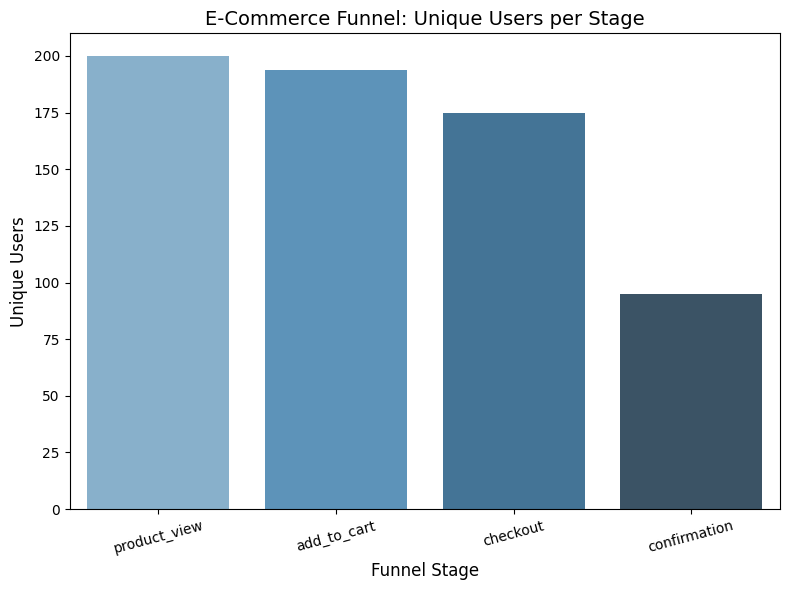

In [25]:
# Create the funnel chart using hue + no legend for future-proofing
plt.figure(figsize=(8,6))
sns.barplot(
    x=funnel.index,
    y=funnel.values,
    hue=funnel.index,
    palette="Blues_d",
    dodge=False,
    legend=False
)

# Add titles and labels
plt.title("E-Commerce Funnel: Unique Users per Stage", fontsize=14)
plt.xlabel("Funnel Stage", fontsize=12)
plt.ylabel("Unique Users", fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [26]:
# Step 1: Get first product view timestamp per user + product
views = web_events_df[web_events_df['page'] == 'product_view']
first_views = views.groupby(['user_id', 'product_id'])['timestamp'].min().reset_index()
first_views.rename(columns={'timestamp': 'view_time'}, inplace=True)

# Preview
first_views.head()


,user_id,product_id,view_time
0,user_1,prod_20,2023-06-09 12:35:00
1,user_10,prod_13,2023-06-05 02:16:00
2,user_10,prod_16,2023-06-19 18:28:00
3,user_10,prod_19,2023-06-16 05:14:00
4,user_10,prod_7,2023-06-30 20:14:00


In [36]:
# Merge orders with first view times
merged = pd.merge(
    Orders_df,
    first_views,
    on=['user_id', 'product_id'],
    how='inner'  # Only keep users who viewed + bought
)

# Rename purchase timestamp
merged.rename(columns={'timestamp': 'purchase_time'}, inplace=True)

# Calculate time to purchase
merged['time_to_purchase'] = merged['purchase_time'] - merged['view_time']

# Keep only cases where view happened before purchase
merged = merged[merged['view_time'] <= merged['purchase_time']]

merged[['user_id', 'product_id', 'view_time', 'purchase_time', 'time_to_purchase']].head()


,user_id,product_id,view_time,purchase_time,time_to_purchase
15,user_139,prod_6,2023-06-02 03:13:00,2023-06-03 03:08:00,0 days 23:55:00
20,user_42,prod_5,2023-06-01 06:20:00,2023-06-03 15:53:00,2 days 09:33:00
22,user_113,prod_16,2023-06-02 15:29:00,2023-06-04 01:08:00,1 days 09:39:00
23,user_170,prod_20,2023-06-02 04:06:00,2023-06-04 03:03:00,1 days 22:57:00
29,user_137,prod_8,2023-06-04 06:43:00,2023-06-04 17:23:00,0 days 10:40:00


In [38]:
# Average time to purchase
avg_time = merged['time_to_purchase'].mean()

# Median time to purchase
median_time = merged['time_to_purchase'].median()

print(f"Average time to purchase: {avg_time}")
print(f"Median time to purchase: {median_time}")


Average time to purchase: 9 days 06:32:27.341772151
Median time to purchase: 8 days 08:04:00


Here’s what the time-to-purchase distribution looks like

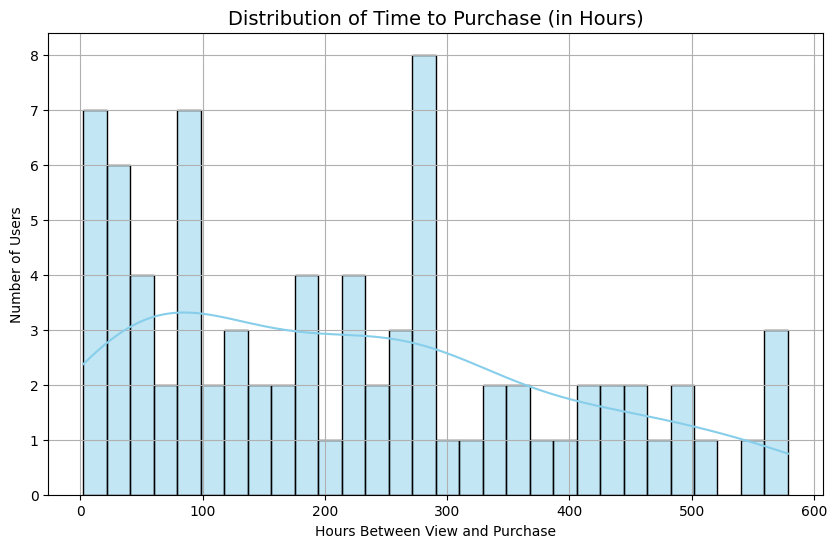

In [40]:
# Convert timedelta to hours for visualization
merged['hours_to_purchase'] = merged['time_to_purchase'].dt.total_seconds() / 3600

# Plot the distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(merged['hours_to_purchase'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Time to Purchase (in Hours)", fontsize=14)
plt.xlabel("Hours Between View and Purchase")
plt.ylabel("Number of Users")
plt.grid(True)
plt.show()


In [44]:
# Group by product and calculate average time to purchase
product_conversion_times = merged.groupby('product_id')['time_to_purchase'].mean().reset_index()

# Sort from fastest to slowest
product_conversion_times = product_conversion_times.sort_values(by='time_to_purchase')

# Convert time delta to hours (optional, for readability)
product_conversion_times['hours_to_purchase'] = product_conversion_times['time_to_purchase'].dt.total_seconds() / 3600

# Display the top 10 fastest-converting products
product_conversion_times[['product_id', 'hours_to_purchase']].head(10)


,product_id,hours_to_purchase
17,prod_7,13.750000
1,prod_10,47.975000
18,prod_8,83.616667
3,prod_12,131.111111
7,prod_16,156.333333
2,prod_11,165.176667
16,prod_6,169.780000
10,prod_19,179.130000
0,prod_1,188.200000
4,prod_13,190.002381


In [45]:
# Sample mapping of product IDs to categories (customize as you like)
category_map = {
    'prod_1': 'Electronics',
    'prod_2': 'Electronics',
    'prod_3': 'Home',
    'prod_4': 'Home',
    'prod_5': 'Fashion',
    'prod_6': 'Fashion',
    'prod_7': 'Beauty',
    'prod_8': 'Beauty',
    'prod_9': 'Books',
    'prod_10': 'Books',
    'prod_11': 'Fitness',
    'prod_12': 'Fitness',
    'prod_13': 'Toys',
    'prod_14': 'Toys',
    'prod_15': 'Kitchen',
}

# Add new 'category' column to your merged dataset
merged['category'] = merged['product_id'].map(category_map)


In [46]:
# Create average time to purchase by category
category_conversion = merged.groupby('category')['time_to_purchase'].mean().dt.total_seconds() / 3600  # convert to hours

# Turn it into a DataFrame
category_df = category_conversion.reset_index().rename(columns={'time_to_purchase': 'avg_hours_to_purchase'})


Which categories are quickest to convert?

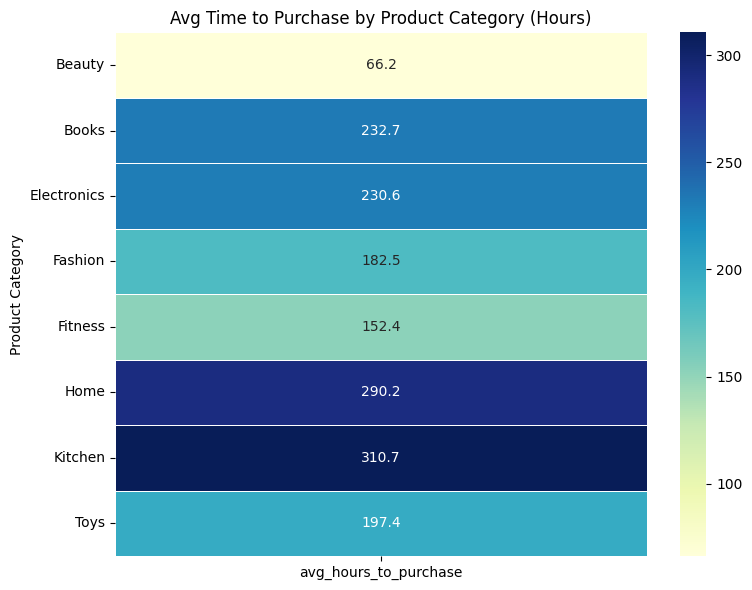

In [48]:
# Create a pivot-style single-column heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    category_df.set_index('category'),
    annot=True,
    cmap="YlGnBu",
    fmt=".1f",
    linewidths=0.5
)

plt.title("Avg Time to Purchase by Product Category (Hours)")
plt.xlabel("")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()


In [49]:
# Sample product-level revenue values
product_prices = {
    'prod_1': 120,
    'prod_2': 75,
    'prod_3': 40,
    'prod_4': 45,
    'prod_5': 60,
    'prod_6': 55,
    'prod_7': 25,
    'prod_8': 30,
    'prod_9': 15,
    'prod_10': 18,
    'prod_11': 80,
    'prod_12': 85,
    'prod_13': 20,
    'prod_14': 22,
    'prod_15': 65,
}

# Add to merged DataFrame
merged['revenue'] = merged['product_id'].map(product_prices)


In [50]:
category_summary = merged.groupby('category').agg({
    'revenue': 'sum',
    'time_to_purchase': lambda x: x.mean().total_seconds() / 3600
}).reset_index()

category_summary.rename(columns={'time_to_purchase': 'avg_hours_to_purchase'}, inplace=True)


Where’s the money actually coming from?

In [51]:
category_summary.sort_values(by='revenue', ascending=False)


,category,revenue,avg_hours_to_purchase
2,Electronics,750.0,230.642857
4,Fitness,655.0,152.402083
5,Home,655.0,290.181111
3,Fashion,515.0,182.485185
7,Toys,206.0,197.410000
6,Kitchen,130.0,310.691667
1,Books,126.0,232.670833
0,Beauty,115.0,66.150000


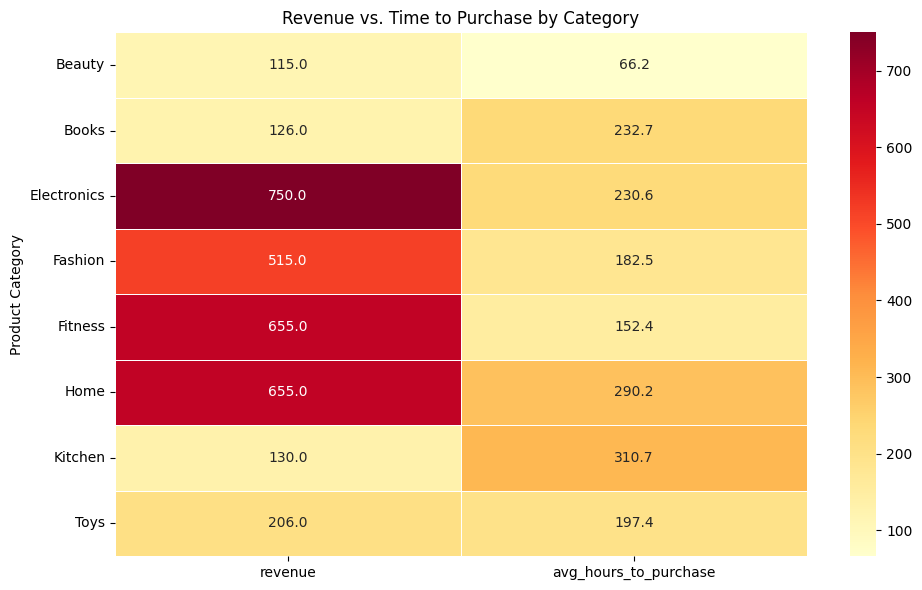

In [53]:
plt.figure(figsize=(10,6))
sns.heatmap(
    category_summary.set_index('category')[['revenue', 'avg_hours_to_purchase']],
    annot=True,
    cmap="YlOrRd",
    fmt=".1f",
    linewidths=0.5
)
plt.title("Revenue vs. Time to Purchase by Category")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()
